In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check(2).csv to Fraud_check(2).csv


In [ ]:
fraud = pd.read_csv('Fraud_check(2).csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [ ]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
fraud.shape

(600, 6)

In [ ]:
fraud.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [ ]:
#Creating dummy vairables for ['Undergrad','Urban'] dropping first dummy variable
df=pd.get_dummies(fraud,columns=['Undergrad','Urban'], drop_first=True)
df

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Urban_YES
0,Single,68833,50047,10,0,1
1,Divorced,33700,134075,18,1,1
2,Married,36925,160205,30,0,1
3,Single,50190,193264,15,1,1
4,Married,81002,27533,28,0,0
...,...,...,...,...,...,...
595,Divorced,76340,39492,7,1,1
596,Divorced,69967,55369,2,1,1
597,Divorced,47334,154058,0,0,1
598,Married,98592,180083,17,1,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
scaler=LabelEncoder()

In [ ]:
df['Marital.Status']=scaler.fit_transform(df['Marital.Status'])
df

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Urban_YES
0,2,68833,50047,10,0,1
1,0,33700,134075,18,1,1
2,1,36925,160205,30,0,1
3,2,50190,193264,15,1,1
4,1,81002,27533,28,0,0
...,...,...,...,...,...,...
595,0,76340,39492,7,1,1
596,0,69967,55369,2,1,1
597,0,47334,154058,0,0,1
598,1,98592,180083,17,1,0


In [ ]:
min(df['Taxable.Income'])

10003

In [ ]:
max(df['Taxable.Income'])

99619

In [ ]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
df["TaxInc"] = pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [ ]:
df.head()

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Urban_YES,TaxInc
0,2,68833,50047,10,0,1,Good
1,0,33700,134075,18,1,1,Good
2,1,36925,160205,30,0,1,Good
3,2,50190,193264,15,1,1,Good
4,1,81002,27533,28,0,0,Good


In [ ]:
#After creation of new col. TaxInc also made its dummies var concating right side of df
df = pd.get_dummies(df,columns = ["TaxInc"])
df

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Urban_YES,TaxInc_Risky,TaxInc_Good
0,2,68833,50047,10,0,1,0,1
1,0,33700,134075,18,1,1,0,1
2,1,36925,160205,30,0,1,0,1
3,2,50190,193264,15,1,1,0,1
4,1,81002,27533,28,0,0,0,1
...,...,...,...,...,...,...,...,...
595,0,76340,39492,7,1,1,0,1
596,0,69967,55369,2,1,1,0,1
597,0,47334,154058,0,0,1,0,1
598,1,98592,180083,17,1,0,0,1


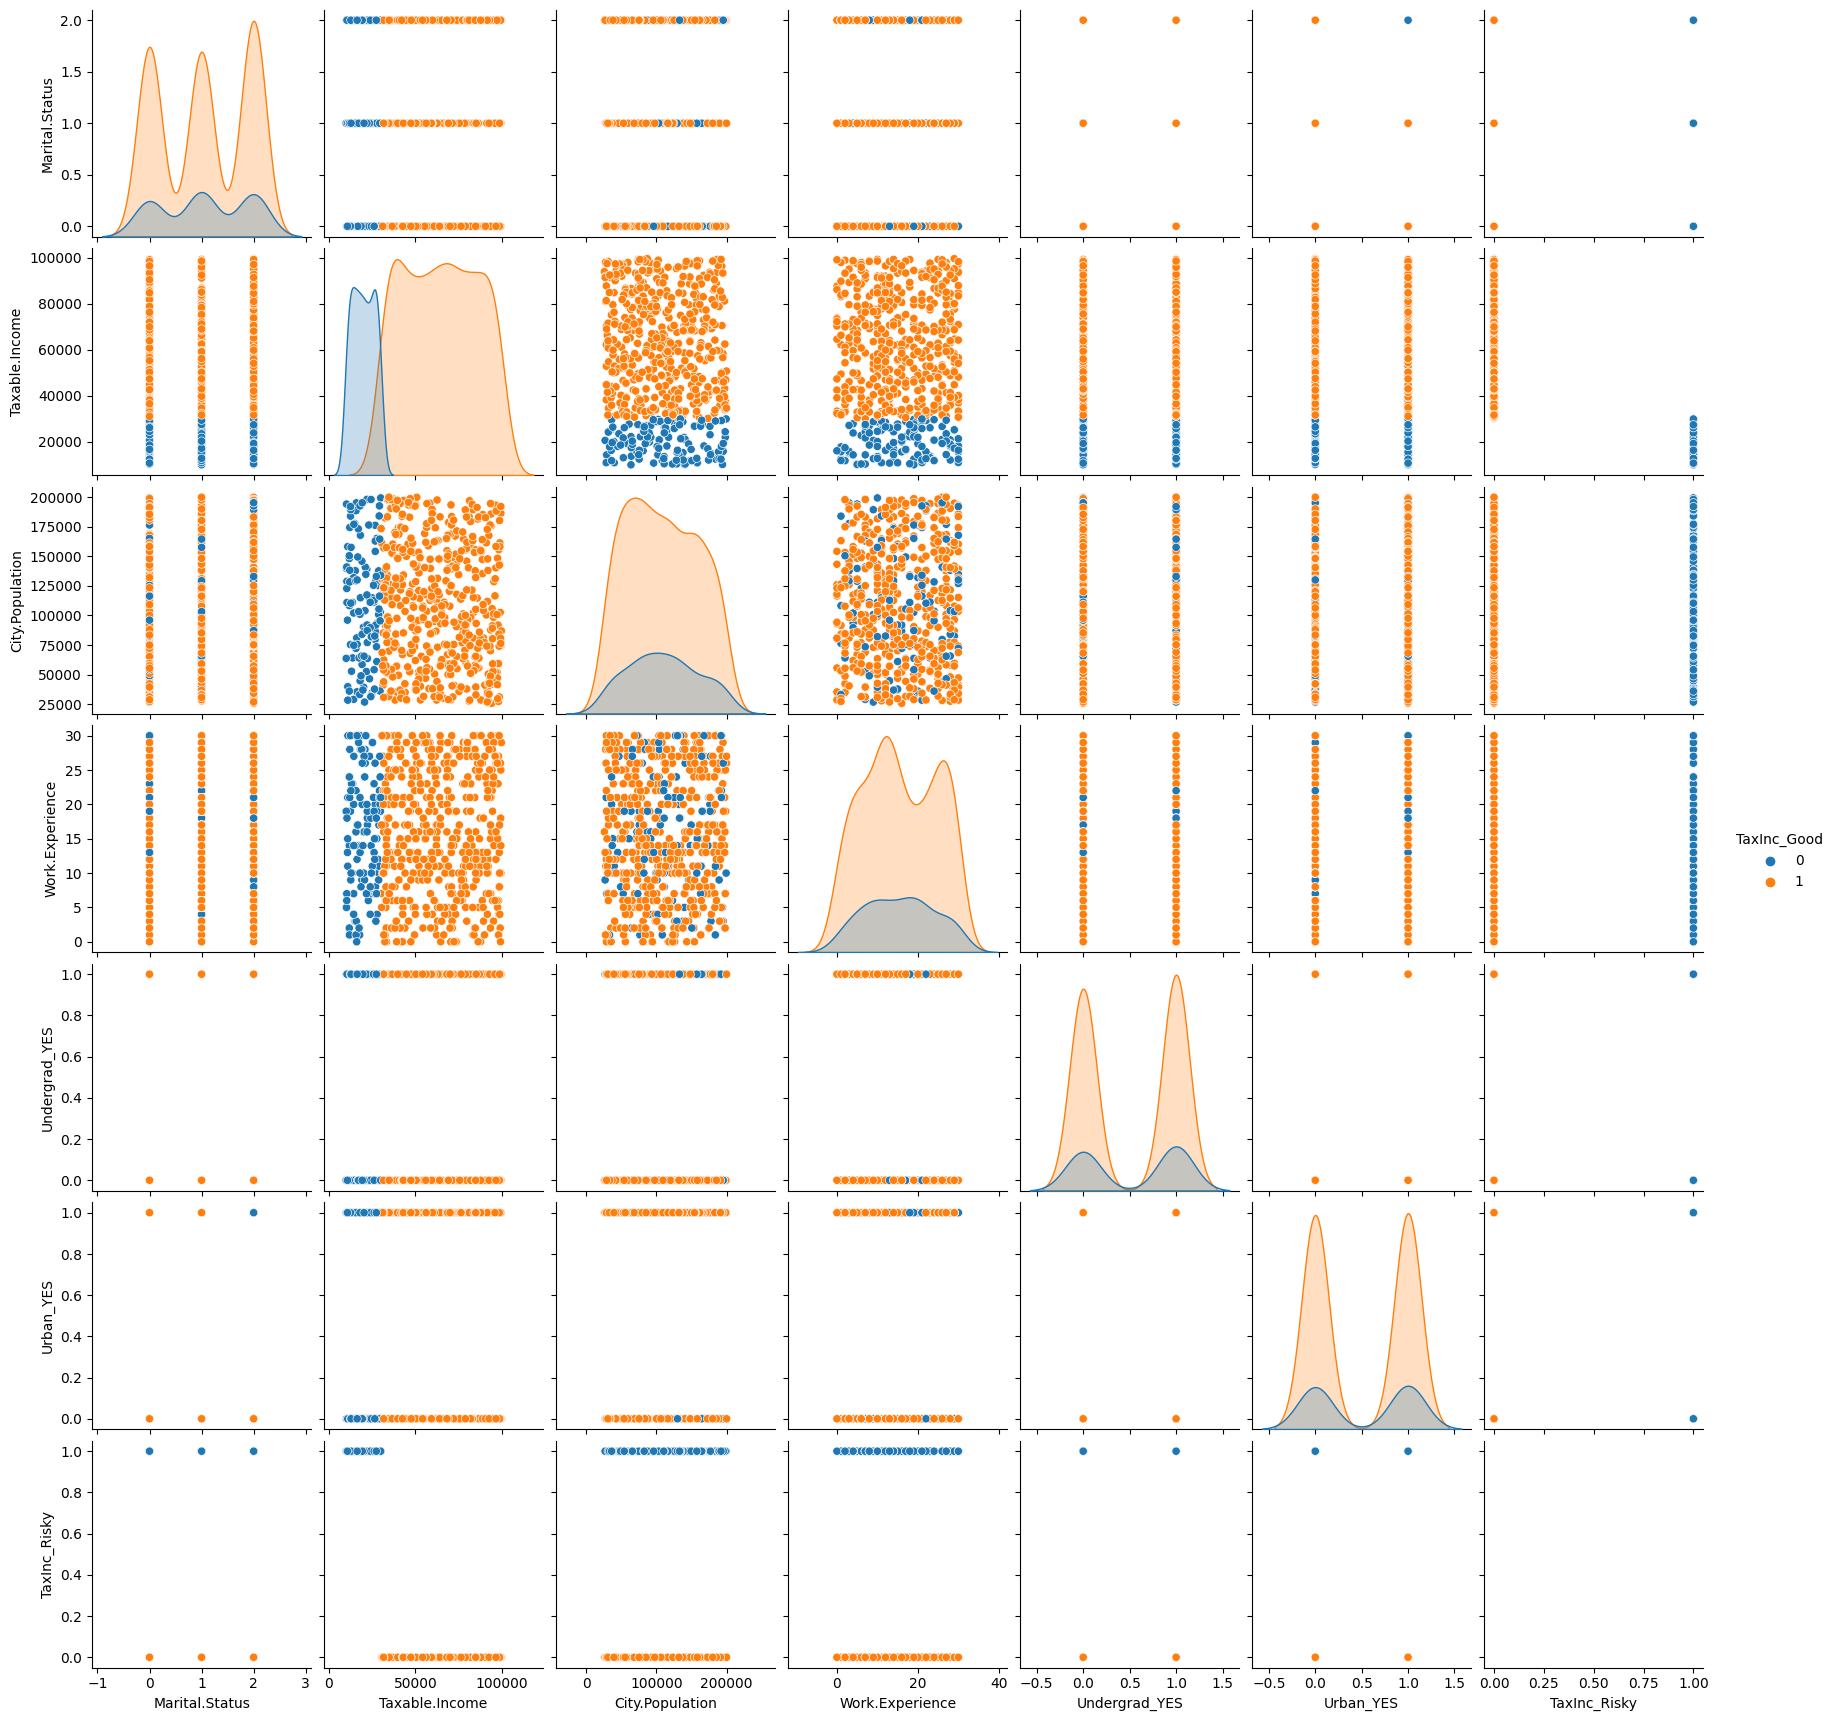

In [ ]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=df, hue = 'TaxInc_Good')

In [ ]:
df

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Urban_YES,TaxInc_Risky,TaxInc_Good
0,2,68833,50047,10,0,1,0,1
1,0,33700,134075,18,1,1,0,1
2,1,36925,160205,30,0,1,0,1
3,2,50190,193264,15,1,1,0,1
4,1,81002,27533,28,0,0,0,1
...,...,...,...,...,...,...,...,...
595,0,76340,39492,7,1,1,0,1
596,0,69967,55369,2,1,1,0,1
597,0,47334,154058,0,0,1,0,1
598,1,98592,180083,17,1,0,0,1


In [ ]:
df.drop(["Taxable.Income"],axis=1,inplace=True)

In [ ]:
df.drop(["TaxInc_Risky"],axis=1,inplace=True)

In [ ]:
df

,Marital.Status,City.Population,Work.Experience,Undergrad_YES,Urban_YES,TaxInc_Good
0,2,50047,10,0,1,1
1,0,134075,18,1,1,1
2,1,160205,30,0,1,1
3,2,193264,15,1,1,1
4,1,27533,28,0,0,1
...,...,...,...,...,...,...
595,0,39492,7,1,1,1
596,0,55369,2,1,1,1
597,0,154058,0,0,1,1
598,1,180083,17,1,0,1


In [ ]:
x=df.iloc[:,0:5]
x

,Marital.Status,City.Population,Work.Experience,Undergrad_YES,Urban_YES
0,2,50047,10,0,1
1,0,134075,18,1,1
2,1,160205,30,0,1
3,2,193264,15,1,1
4,1,27533,28,0,0
...,...,...,...,...,...
595,0,39492,7,1,1
596,0,55369,2,1,1
597,0,154058,0,0,1
598,1,180083,17,1,0


In [ ]:
y=df['TaxInc_Good']
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: TaxInc_Good, Length: 600, dtype: uint8

In [ ]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [ ]:
x_train

,Marital.Status,City.Population,Work.Experience,Undergrad_YES,Urban_YES
332,0,84132,1,1,0
13,1,86649,16,0,1
274,1,112584,25,1,0
257,1,31611,17,1,1
112,2,193038,26,1,1
...,...,...,...,...,...
440,2,170407,13,0,1
165,1,38463,23,1,1
7,2,131253,3,1,1
219,0,26814,9,1,0


In [ ]:
y_train

332    1
13     1
274    1
257    1
112    1
      ..
440    1
165    1
7      1
219    0
326    0
Name: TaxInc_Good, Length: 480, dtype: uint8

In [ ]:
x_test

,Marital.Status,City.Population,Work.Experience,Undergrad_YES,Urban_YES
159,2,28504,1,1,0
307,0,31819,25,0,0
253,2,77256,29,1,0
528,1,172612,10,0,0
137,2,115884,6,1,0
...,...,...,...,...,...
102,0,91488,23,1,0
577,1,52940,5,1,1
18,0,59269,6,1,0
560,0,182562,24,0,0


In [ ]:
y_test

159    1
307    1
253    1
528    1
137    0
      ..
102    1
577    1
18     1
560    1
62     1
Name: TaxInc_Good, Length: 120, dtype: uint8

##**BUILDING DECISION TREE CLASSIFIER USING ENTROPY CRITERIA**

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
from sklearn import tree

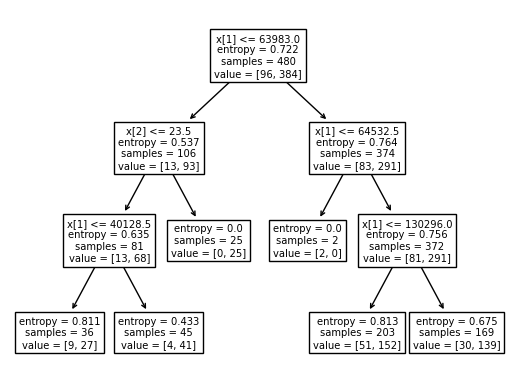

In [ ]:
#Plot the decision tree
tree.plot_tree(model);

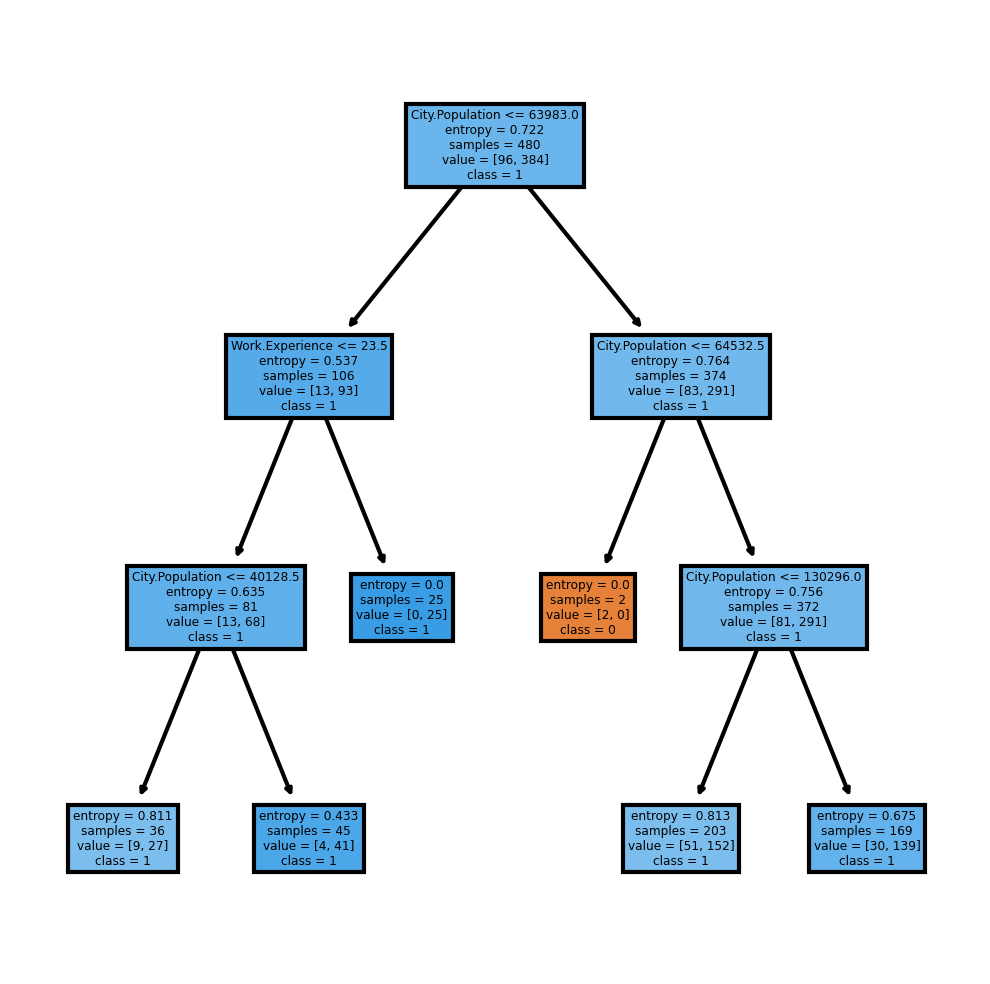

In [ ]:
fn=['Marital.Status','City.Population','Work.Experience','Undergrad_YES','Urban_YES','Price']
cn=['0', '1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [ ]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

1    120
dtype: int64

In [ ]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [ ]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,1
TaxInc_Good,
0,28
1,92


In [ ]:
#accuracy
np.mean(preds==y_test)

0.7666666666666667

##**BUILDING DECISION TREE CLASSIFIER(CART) USING GINI CRITERIA**

In [ ]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [ ]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

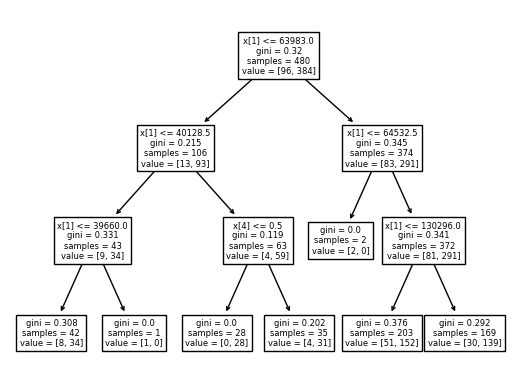

In [ ]:
tree.plot_tree(model_gini);

In [ ]:
pred=model.predict(x_test)

In [ ]:
pd.crosstab(y_test,pred)

col_0,1
TaxInc_Good,
0,28
1,92


In [ ]:
np.mean(preds==y_test)

0.7666666666666667